<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()

--2025-12-17 01:39:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  61.6MB/s    in 2.5s    

2025-12-17 01:39:41 (61.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



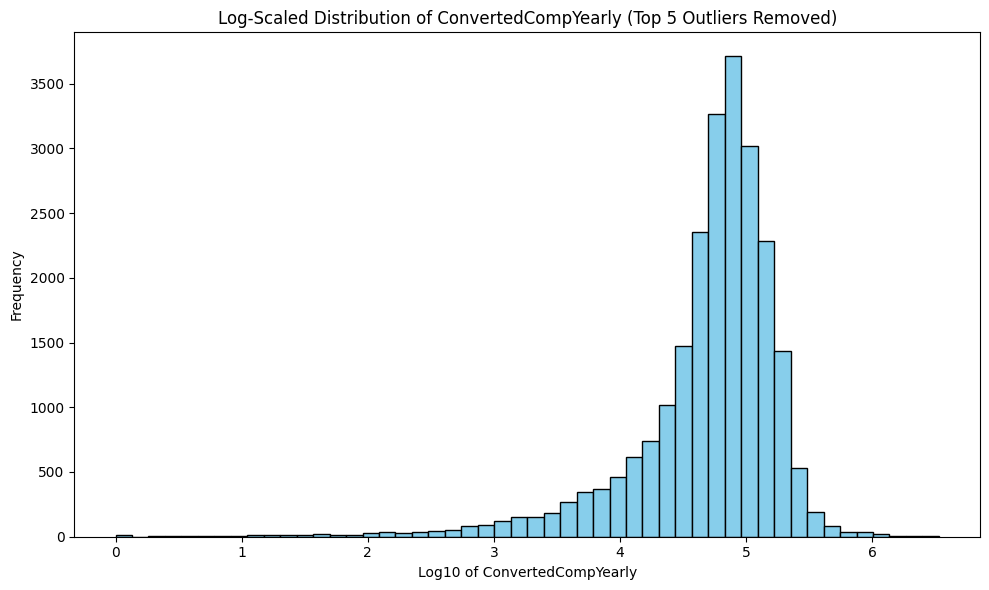

In [7]:
## Write your code here
import numpy as np

## Drop NaN Values
df_a = df.dropna(subset=['ConvertedCompYearly'])

## Identify and drop top 5 largest ConvertedCompYearly values
outliers = df_a['ConvertedCompYearly'].nlargest(5).index
df_b = df_a.drop(index=outliers)

plt.figure(figsize=(10,6))
plt.hist(np.log10(df_b['ConvertedCompYearly']), bins=50, color='skyblue', edgecolor='black')
plt.title('Log-Scaled Distribution of ConvertedCompYearly (Top 5 Outliers Removed)')
plt.xlabel('Log10 of ConvertedCompYearly')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



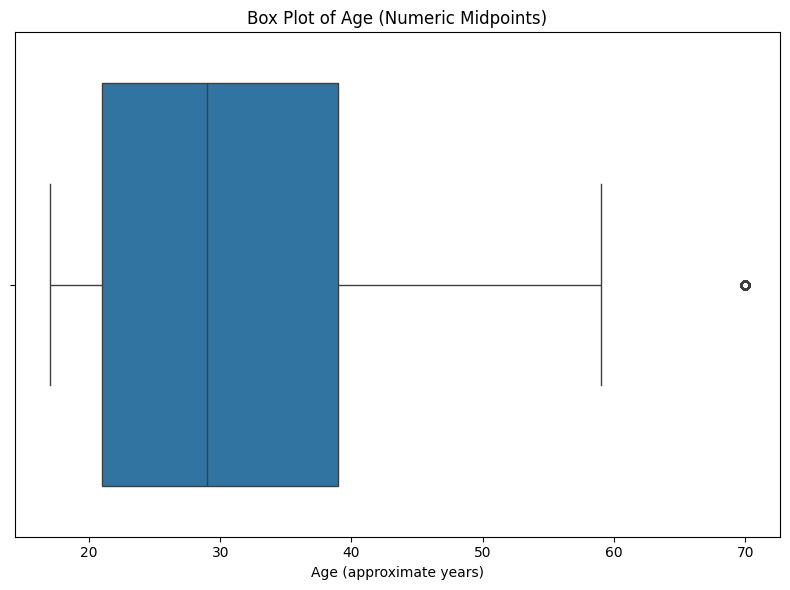

In [11]:
## Write your code here
import seaborn as sns
# Map Age categories to numeric midpoints
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70,
    "Prefer not to say": None
}

df['Age_numeric'] = df['Age'].map(age_map)

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Age_numeric'])
plt.title('Box Plot of Age (Numeric Midpoints)')
plt.xlabel('Age (approximate years)')
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



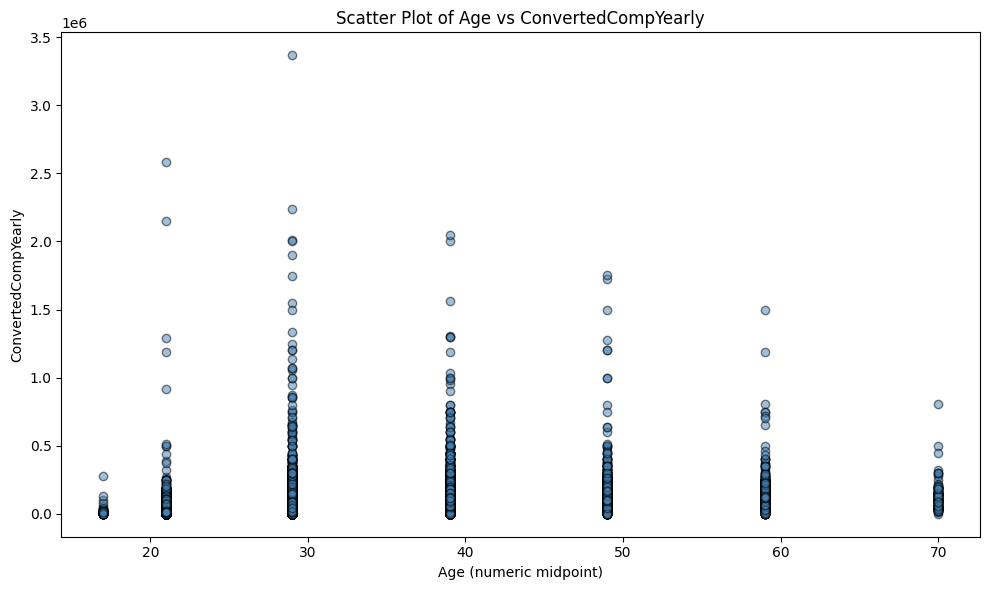

In [16]:
## Write your code here
## Drop NaN 
df_a = df.dropna(subset=['Age_numeric'])
df_b = df_a.dropna(subset=['ConvertedCompYearly'])

## Drop top 5 outliers in ConvertedCompYearly
outliers = df_b.nlargest(5, 'ConvertedCompYearly').index
df_c = df_b.drop(index=outliers)

plt.figure(figsize=(10,6))
plt.scatter(df_c['Age_numeric'], df_c['ConvertedCompYearly'], 
            alpha=0.5, color='steelblue', edgecolor='k')
plt.title('Scatter Plot of Age vs ConvertedCompYearly')
plt.xlabel('Age (numeric midpoint)')
plt.ylabel('ConvertedCompYearly')
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


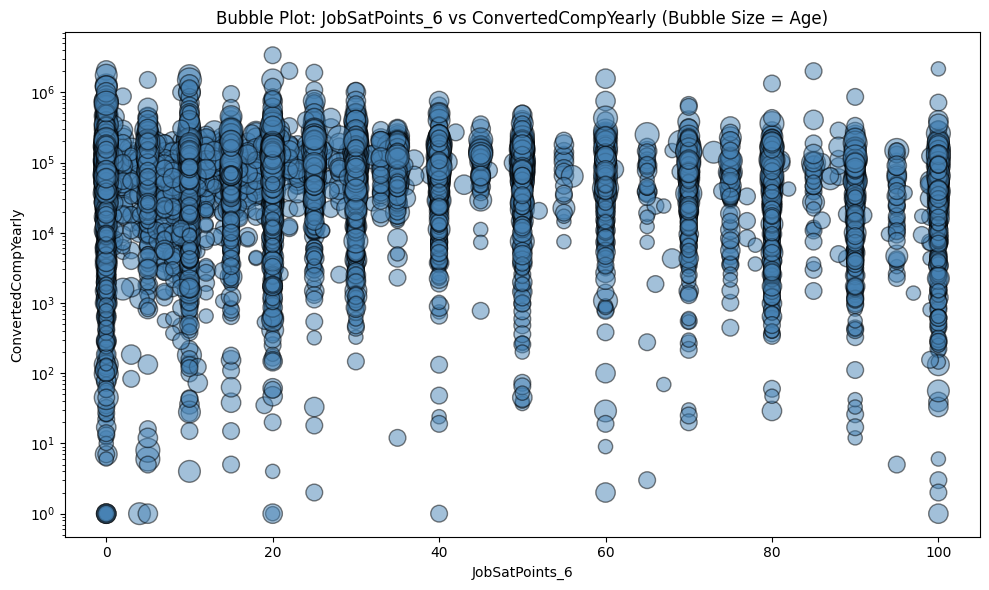

In [17]:
## Write your code here
## Drop NaN for JobSatPoints_6
df_d = df_c.dropna(subset=['JobSat'])

plt.figure(figsize=(10,6))
plt.scatter(
    df_d['JobSatPoints_6'],
    df_d['ConvertedCompYearly'],
    s=df_d['Age_numeric']*5,
    alpha=0.5,
    color='steelblue',
    edgecolor='k'
)
plt.title('Bubble Plot: JobSatPoints_6 vs ConvertedCompYearly (Bubble Size = Age)')
plt.xlabel('JobSatPoints_6')
plt.ylabel('ConvertedCompYearly')
plt.yscale('log')
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



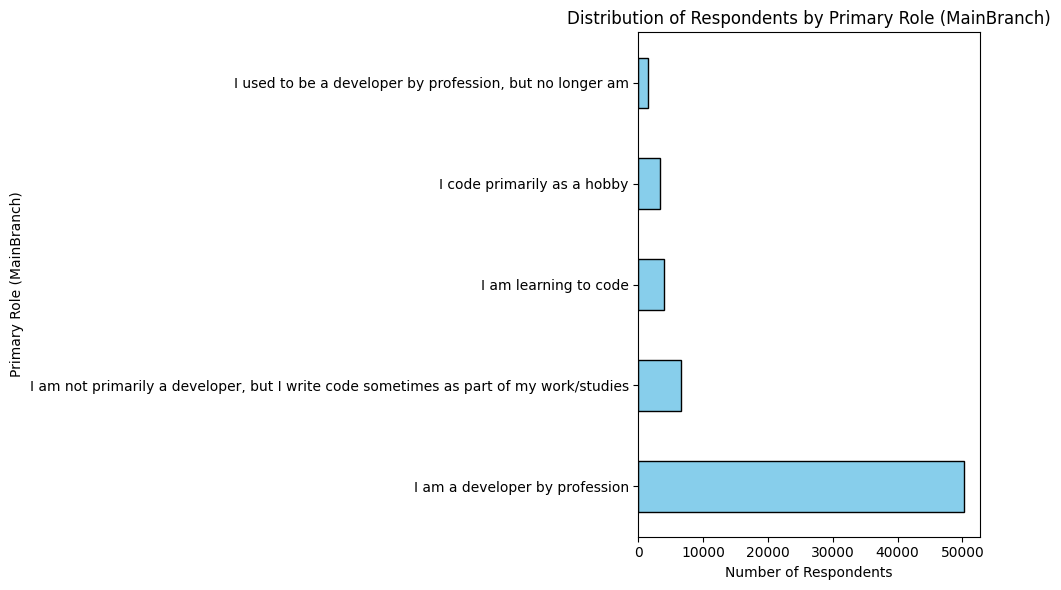

In [18]:
## Write your code here
## Drop NaN
df_a = df.dropna(subset=['MainBranch'])
branch_counts = df_a['MainBranch'].value_counts()

## Create horizontal bar chart
plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Distribution of Respondents by Primary Role (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role (MainBranch)')
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



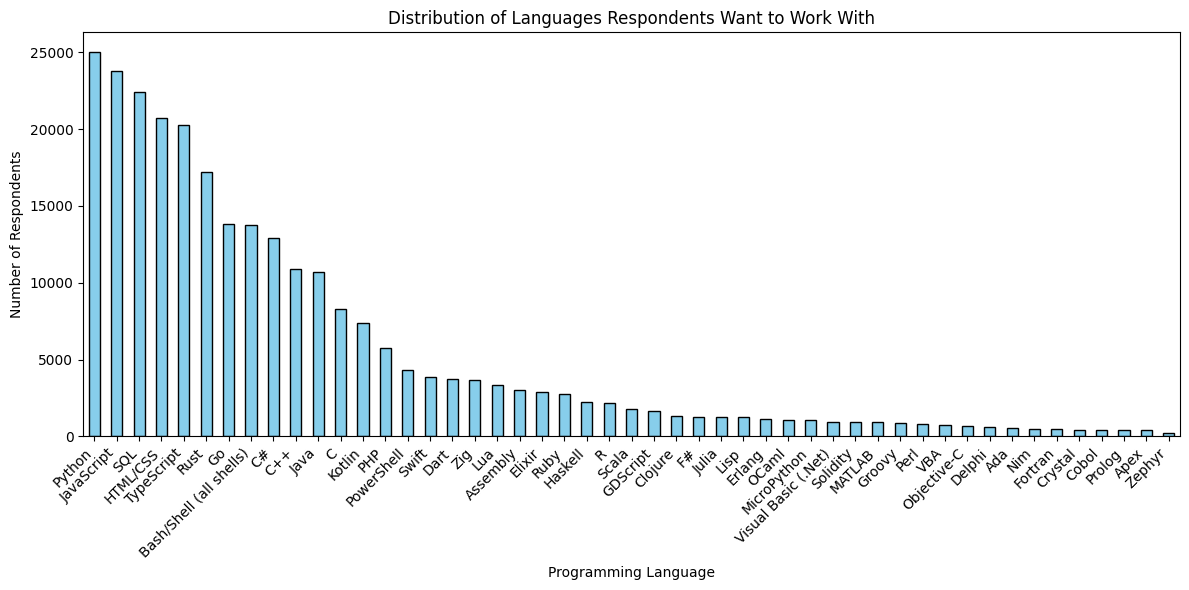

In [19]:
## Write your code here
# Drop NaN values in LanguageWantToWorkWith
df_lang = df.dropna(subset=['LanguageWantToWorkWith'])

# Split the semi-colon separated strings into lists
df_lang_expanded = df_lang['LanguageWantToWorkWith'].str.split(';')

# Flatten the lists into a single Series
all_langs = df_lang_expanded.explode()

# Strip whitespace around language names
all_langs = all_langs.str.strip()

# Count frequency of each language
lang_counts = all_langs.value_counts()

# Plot vertical bar chart
plt.figure(figsize=(12,6))
lang_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


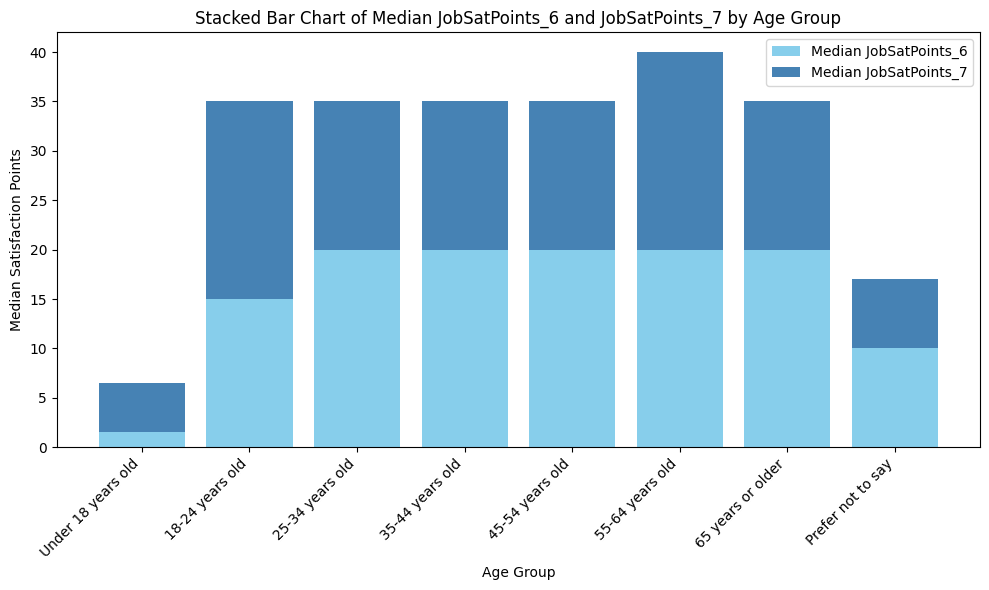

In [21]:
## Write your code here
# Define Age order based on your value_counts
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

# Drop NaN values for relevant columns
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Age and compute medians
median_by_age = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Convert Age to categorical with specified order
median_by_age['Age'] = pd.Categorical(median_by_age['Age'], categories=age_order, ordered=True)

# Sort by Age order
median_by_age = median_by_age.sort_values('Age')

# Plot stacked bar chart
plt.figure(figsize=(10,6))
plt.bar(median_by_age['Age'], median_by_age['JobSatPoints_6'], label='Median JobSatPoints_6', color='skyblue')
plt.bar(median_by_age['Age'], median_by_age['JobSatPoints_7'], 
        bottom=median_by_age['JobSatPoints_6'], label='Median JobSatPoints_7', color='steelblue')

plt.title('Stacked Bar Chart of Median JobSatPoints_6 and JobSatPoints_7 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



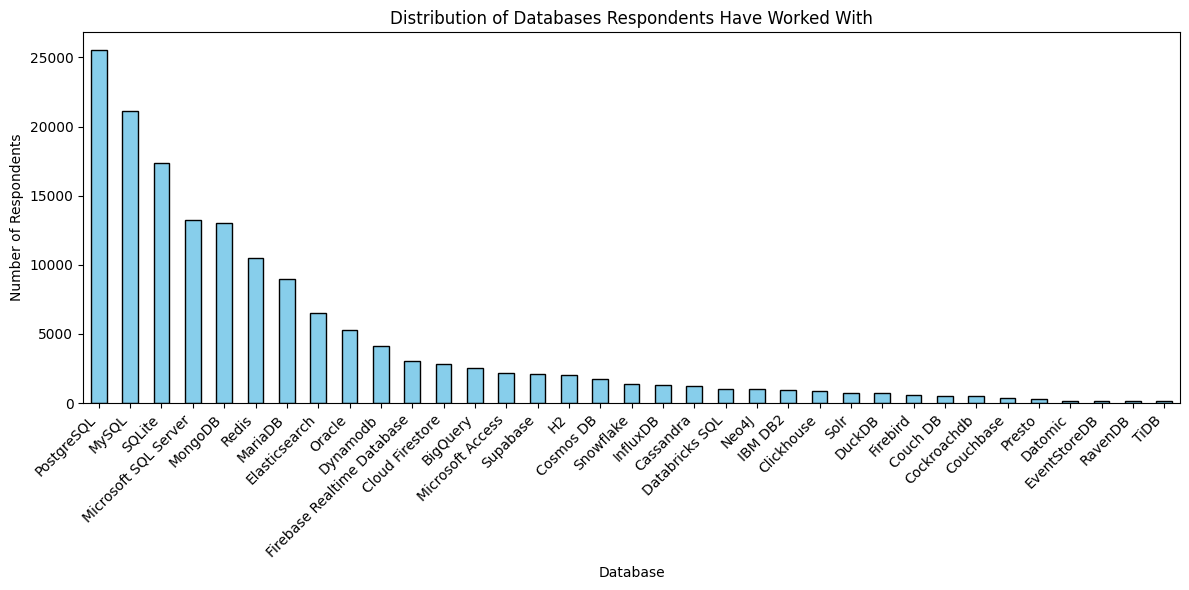

In [22]:
## Write your code here
# Drop NaN values in DatabaseHaveWorkedWith
df_db = df.dropna(subset=['DatabaseHaveWorkedWith'])

# Split the semi-colon separated strings into lists
df_db_expanded = df_db['DatabaseHaveWorkedWith'].str.split(';')

# Flatten the lists into a single Series
all_dbs = df_db_expanded.explode()

# Strip whitespace around database names
all_dbs = all_dbs.str.strip()

# Count frequency of each database
db_counts = all_dbs.value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
db_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



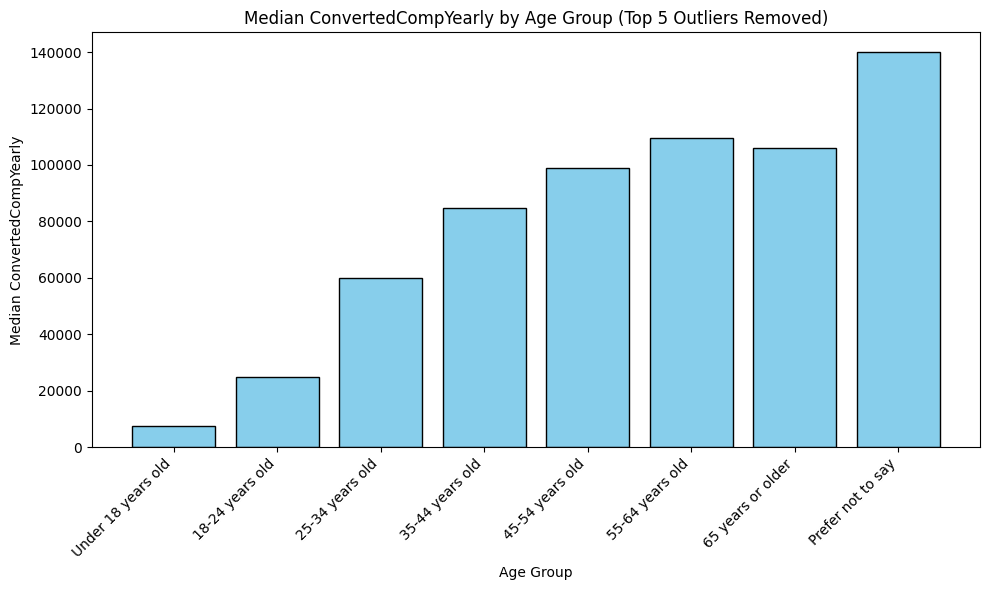

In [24]:
## Write your code here
# --- Step 1: Drop NaN values ---
df_clean = df.dropna(subset=['ConvertedCompYearly', 'Age'])

# --- Step 2: Remove top 5 largest ConvertedCompYearly values ---
outliers = df_clean['ConvertedCompYearly'].nlargest(5).index
df_clean = df_clean.drop(index=outliers)

# --- Step 3: Define Age order (based on your value_counts) ---
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

# --- Step 4: Group by Age and compute median ConvertedCompYearly ---
median_by_age = df_clean.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# --- Step 5: Convert Age to categorical with specified order ---
median_by_age['Age'] = pd.Categorical(median_by_age['Age'], categories=age_order, ordered=True)

# --- Step 6: Sort by Age order ---
median_by_age = median_by_age.sort_values('Age')

# --- Step 7: Plot grouped bar chart ---
plt.figure(figsize=(10,6))
plt.bar(median_by_age['Age'], median_by_age['ConvertedCompYearly'], color='skyblue', edgecolor='black')

plt.title('Median ConvertedCompYearly by Age Group (Top 5 Outliers Removed)')
plt.xlabel('Age Group')
plt.ylabel('Median ConvertedCompYearly')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



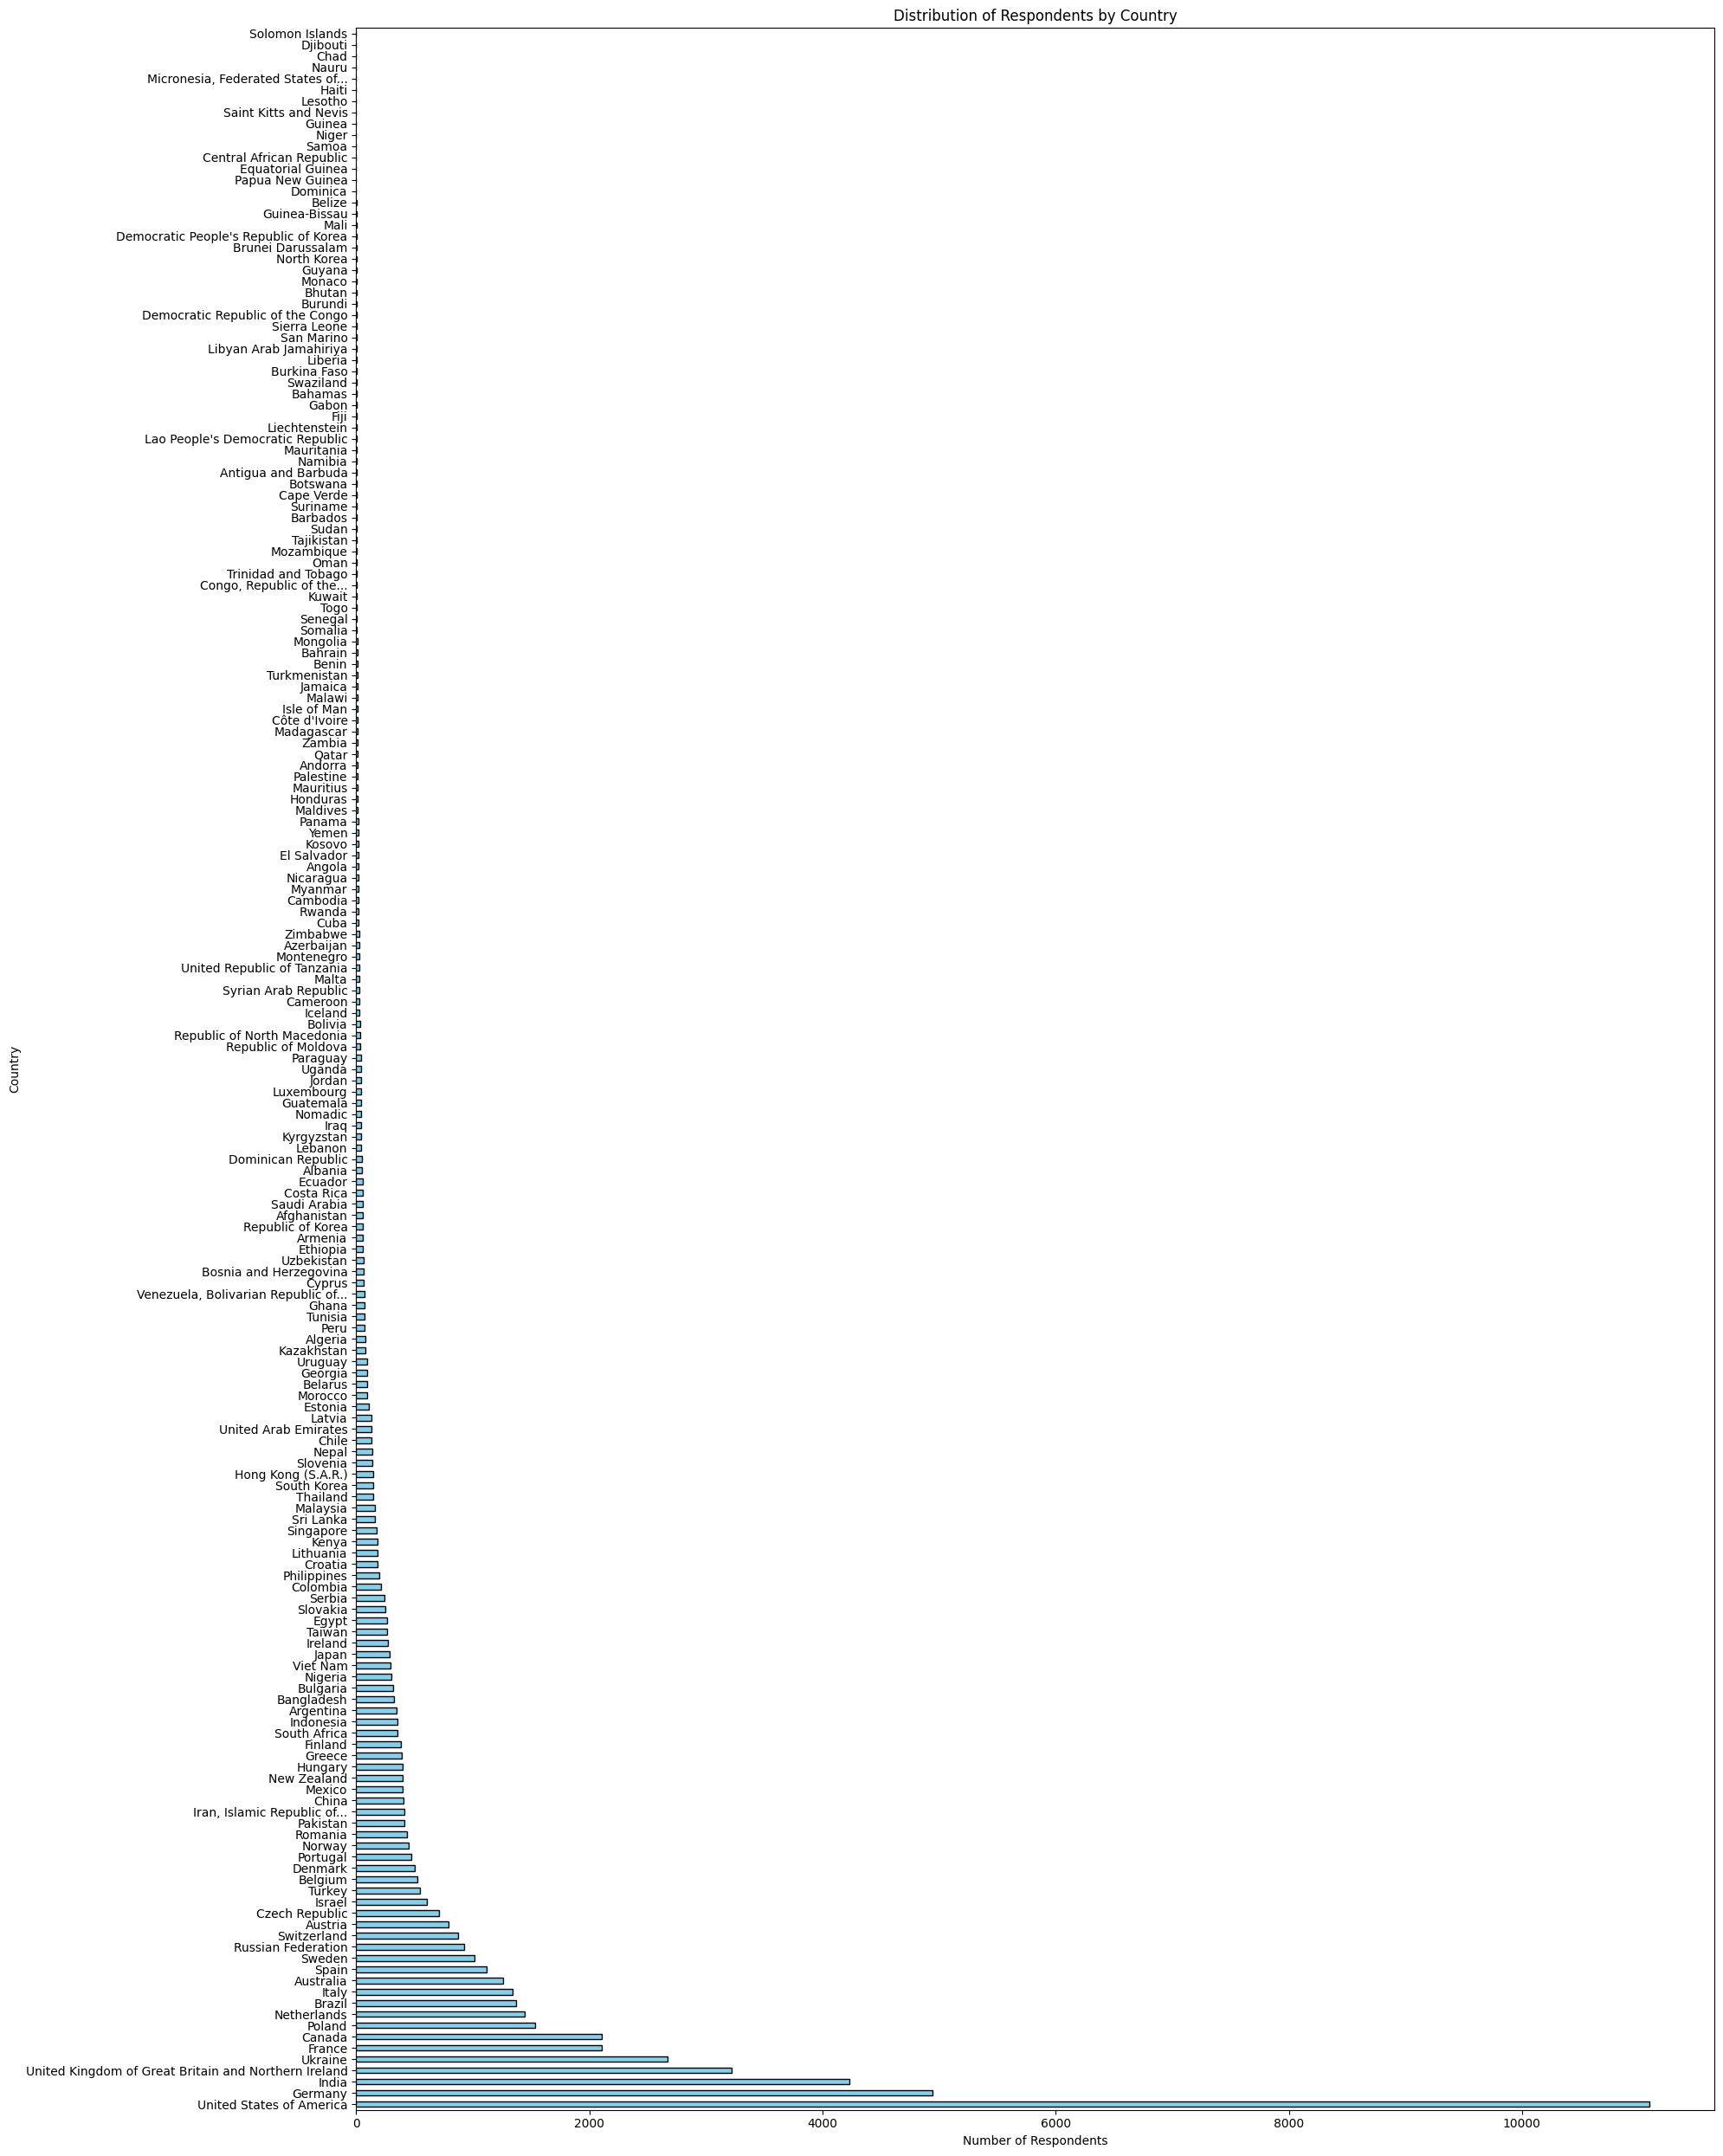

In [28]:
## Write your code here
# Count the frequency of each country
country_counts = df['Country'].value_counts()

# Plot horizontal bar chart (Country on y-axis, counts on x-axis)
plt.figure(figsize=(20,25))  # taller figure to fit many countries
country_counts.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Distribution of Respondents by Country')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
